## 인공지능(AI) 분류
1. 규칙기반 AI : rule-based system , 수동으로 규칙(특징)을 입력하면 기계가 추론, Prolog, LISP
2. 학습기반 AI : 머신 러닝(Machine Learning), 데이터를 입력하면 기계가 스스로 새로운 특징을 학습하고 예측


## 회귀 (Regression) 모델
1. 선형 회귀(Linear Regression) : 1차 함수, 직선의 방정식
2. 가중치(Weight) : 입력변수가 출력에 영향을 미치는 정도를 설정, 기울기 값 , 회귀 계수
3. 편향(Bias) : 기본 출력 값이 활성화 되는 정도를 설정, y 절편, 회귀 계수
4. 비용함수(Cost Function) : 2차 함수, 포물선의 방정식, (예측값 - 실제값)^2
    - cost(비용) = 오차 = 에러 = 손실(loss)
    - cost(W,b) = $(H(x) - y)^2$
5. 예측(가설,Hypothesis) 함수: predict, H(x) : 예측 값, y:답,결정값,target,label, x:입력,feature(피쳐)
    - $H(X) = W*X + b$
6. 경사 하강법(Gradient Descent Algorithm)
: 비용이 가장 작은 기울기 값을 구하는 알고리즘

w:-1, cost: 18.666666666666668
w:0,  cost: 4.666666666666667
w:1,  cost: 0.0
w:2,  cost: 4.666666666666667
w:3,  cost: 18.666666666666668


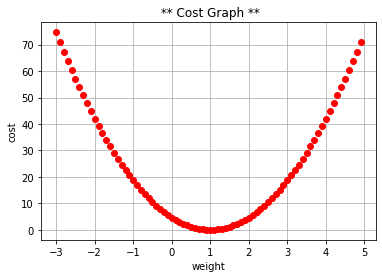

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 비용함수의 구현
def cost(x,y,w):     
    c = 0
    for k in range(len(x)):
        hx = w * x[k]        # 예측 함수
        loss = (hx - y[k])**2   # 비용함수 ,(예측값 - 실제값)^2
        c += loss
    return c/len(x)          # 평균 제곱 오차   

x = [1,2,3]   # 입력 값  ,         독립 변수
y = [1,2,3]   # 실제값,답, target, 종속 변수

print('w:-1, cost:',cost(x,y,-1))   # hx = [-1,-2,-3]
print('w:0,  cost:',cost(x,y,0))    # hx = [0,0,0]
print('w:1,  cost:',cost(x,y,1))    # hx = [1,2,3]  , cost: 0.0
print('w:2,  cost:',cost(x,y,2))    # hx = [2,4,6]  
print('w:3,  cost:',cost(x,y,3))    # hx = [3,6,9] 

# 비용함수 시각화 : x축은 weight, y축은 cost로 하는 2차 함수, 포물선의 방정식
for k in range(-30,50):
    w = k/10
    c = cost(x,y,w)
    plt.plot(w,c,'ro')
    
plt.title(' ** Cost Graph **') 
plt.xlabel('weight')
plt.ylabel('cost')
plt.grid(True)
plt.show()

미분 : 순간 변화량,기울기, x 축으로 1 만큼 움직였을 때 y 축으로 움직인 거리

- 함수 미분 공식 정리 : $f(x) = x ^n$ ===> $f'(x) = n*x^(n-1)$
    - $y = 3$ ===> $y' = 0$
    - $y = 2*x$ ===> $y' = 2$
    - $y = x^2$ ===> $y' = 2*x$
    - $y = (x + 1)^2$ ===> $y' = 2(x + 1)$ 
    - $y = x^2 + 2x + 1$ ===> $y' = 2x + 2 = 2(x + 1)$

In [2]:
def cost(x,y,w):     
    c = 0
    for k in range(len(x)):
        hx = w * x[k]           # 예측 함수
        loss = (hx - y[k])**2   # 비용함수 ,(예측값 - 실제값)^2
        c += loss
    return c/len(x)


def gradient_descent(x,y,w):
    c = 0
    for i in range(len(x)):
        hx = w*x[i]
        loss = (hx - y[i])*x[i]  # 곱하기 2를 생략한 비용함수의 미분 공식
        c += loss
    
    return c/len(x)

In [9]:
def fit(x,y):
    print('--------------start learning!')
    w,old = 10,100
    for i in range(1000):
        c = cost(x,y,w)
        grad = gradient_descent(x,y,w)
        w -= 0.1*grad       # 0.1 :학습률(learning rate), 하이퍼 파라메터, 가중치의 업데이트 실행
        print('[%3d]'%i, 'cost:',c,'old')
        if c >= old and abs(c - old)< 1.0e-15:   # cost가 1.0e-15 값 보다도 더 줄지 않을 때
            break
        old = c
    print('--------- end learning!!') 
    return w



def predict(w,x):
    hx = w*np.array(x)
    return list(hx)

def get_accuracy(w,x_test,y_test):
    y_predict = predict(w,x_test)
    print(y_predict)
    correct = 0
    for k, _ in enumerate(y_test):
        if y_test[k] == y_predict[k]:
            correct+=1
    accuracy = round(correct/len(y_test),2)
    return accuracy


def get_rmse(w,x_test,y_test):
    y_predict = predict(w,x_test)
    print(y_predict)
    squared_error = 0
    for k, _ in enumerate(y_test):
        squared_error+=(y_predict[k] - y_test[k])**2
    mse = squared_error / len(y_test)
    rmse = np.sqrt(mse)
    return rmse

In [11]:
x_train = [1,2,3,4,5]
y_train = [2,4,6,8,10]
w = fit(x_train,y_train)
print('weight : ',w)

x_predict = [6,7,8,9,10]
y_predict = predict(w,x_predict)
print('y_predict : ',y_predict)

x_test = [10,20,30,40,50]
y_test = [20,40,60,80,99]
accuracy = get_accuracy(w,x_test,y_test)
print('Accuracy:',accuracy)

x_test = [10,20,30,40,50]
y_test = [20,40,60,80,99]
rmse = get_rmse(w,x_test,y_test)
print('RMSE:',rmse) 

--------------start learning!
[  0] cost: 704.0 old
[  1] cost: 7.040000000000012 old
[  2] cost: 0.07040000000000013 old
[  3] cost: 0.0007039999999999871 old
[  4] cost: 7.03999999999845e-06 old
[  5] cost: 7.040000000016923e-08 old
[  6] cost: 7.040000000546988e-10 old
[  7] cost: 7.040000000689097e-12 old
[  8] cost: 7.039999989746739e-14 old
[  9] cost: 7.039999978378055e-16 old
[ 10] cost: 7.040001164984472e-18 old
[ 11] cost: 7.040001164984472e-20 old
[ 12] cost: 7.039830636607046e-22 old
[ 13] cost: 7.040612264052197e-24 old
[ 14] cost: 7.028750665519215e-26 old
[ 15] cost: 6.888333424389875e-28 old
[ 16] cost: 7.257520328033308e-30 old
[ 17] cost: 0.0 old
[ 18] cost: 0.0 old
--------- end learning!!
weight :  2.0
y_predict :  [12.0, 14.0, 16.0, 18.0, 20.0]
[20.0, 40.0, 60.0, 80.0, 100.0]
Accuracy: 0.8
[20.0, 40.0, 60.0, 80.0, 100.0]
RMSE: 0.4472135954999579


In [13]:
df = pd.read_csv('boston_train.csv')

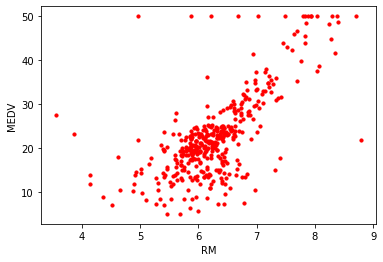

In [18]:
plt.scatter(df['RM'],df['MEDV'],color='r',s=10)
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.show()

[[9.02315014]]
[-33.99803804]


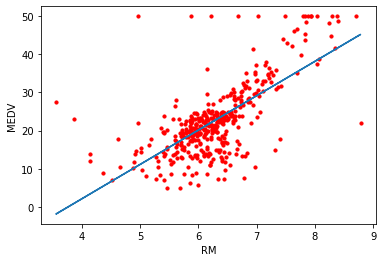

In [19]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
x = df['RM'].values.reshape(-1,1)   # (400,1)
y = df['MEDV'].values.reshape(-1,1) # (400,1)

lr.fit(x,y)

print(lr.coef_)        
print(lr.intercept_)   
# H(x) = 9.02315014 * x - 33.99803804
    
# 예측 : x만 입력    
y_predict = lr.predict(x)

# 시각화
# 원본의 출력
plt.scatter(df['RM'],df['MEDV'],color='r',s=10)
plt.xlabel('RM')
plt.ylabel('MEDV')

# 예측 함수(직선 그래프)  
plt.plot(x,y_predict)
plt.show()

In [20]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y,y_predict)
rmse = np.sqrt(mse)   # 제곱근
print('RMSE:',rmse)   # RMSE: 6.964958263761021

# R2(R-squared), 결정 계수 :  예측 값의 분산/실제값의 분산, 1일때 설명력이 높다, 절대 지표로 사용
from sklearn.metrics import r2_score

r2 = r2_score(y,y_predict)
print('r2_score:',r2) 

RMSE: 6.964958263761021
r2_score: 0.46928062004385107


[[-1.59072134e-01  4.08534780e-02 -1.18682966e-01 -2.14042031e+01
   6.06293561e+00 -4.40157092e-02 -1.81025024e+00  4.29464930e-04
  -1.08359905e+00]]
[27.68496713]


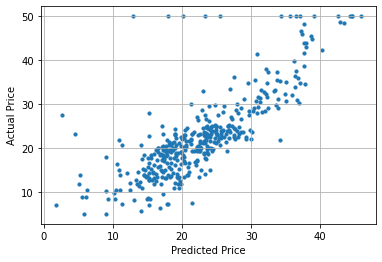

In [21]:
x = df.iloc[:,:-1]  # 마지막 컬럼을 제외, 9개 컬럼을 피쳐로 사용  , (400,9)
y = df['MEDV'].values.reshape(-1,1)                            # (400,1)

#  클래스 인스턴스 생성
lr = LinearRegression()

# 학습 : x,y를 입력
lr.fit(x,y)

print(lr.coef_)        # weight 이 9개가 생성    , 회귀 계수
print(lr.intercept_)   # bias : [27.68496713]    , 회귀 절편
                       # H(x1...x9) = w1*x1 + w2*x2 + w3*x3 .... w9*x9 + 27.68496713

# 예측 : x만 입력    
y_predict = lr.predict(x) 

# 시각화
plt.scatter(y_predict,y,s=10)
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.grid(True)
plt.show()

In [22]:
mse = mean_squared_error(y,y_predict)
rmse = np.sqrt(mse)   # 제곱근
print('RMSE:',rmse)   # RMSE: 6.964958263761021  --> 5.753475905312981  ,감소

# R2(R-squared), 결정 계수 :  예측 값의 분산/실제값의 분산, 1일때 설명력이 높다, 절대 지표로 사용

r2 = r2_score(y,y_predict)
print('r2_score:',r2)

RMSE: 5.753475905312981
r2_score: 0.6378499850549991


In [23]:
df.corr() 

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,MEDV
CRIM,1.000000,-0.197764,0.383433,0.407698,-0.219043,0.350003,-0.377643,0.563791,0.284306,-0.375836
ZN,-0.197764,1.000000,-0.532929,-0.521745,0.328418,-0.561062,0.665677,-0.323539,-0.393904,0.365931
INDUS,0.383433,-0.532929,1.000000,0.758157,-0.393738,0.644559,-0.717796,0.722435,0.386248,-0.465083
NOX,0.407698,-0.521745,0.758157,1.000000,-0.309519,0.735999,-0.776624,0.664923,0.185284,-0.410425
RM,-0.219043,0.328418,-0.393738,-0.309519,1.000000,-0.253271,0.211441,-0.302268,-0.395436,0.685041
AGE,0.350003,-0.561062,0.644559,0.735999,-0.253271,1.000000,-0.742486,0.521723,0.260205,-0.368922
DIS,-0.377643,0.665677,-0.717796,-0.776624,0.211441,-0.742486,1.000000,-0.555040,-0.227288,0.236714
TAX,0.563791,-0.323539,0.722435,0.664923,-0.302268,0.521723,-0.555040,1.000000,0.473023,-0.449570
PTRATIO,0.284306,-0.393904,0.386248,0.185284,-0.395436,0.260205,-0.227288,0.473023,1.000000,-0.531764
MEDV,-0.375836,0.365931,-0.465083,-0.410425,0.685041,-0.368922,0.236714,-0.449570,-0.531764,1.000000


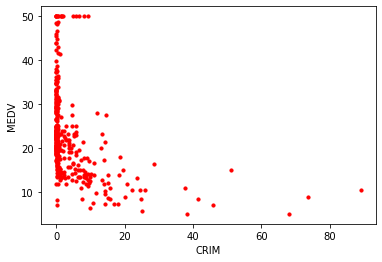

In [24]:
plt.scatter(df['CRIM'],df['MEDV'],color='r',s=10)
plt.xlabel('CRIM')
plt.ylabel('MEDV')
plt.show()